# Carregamento de dados, armazenamento e formatos de arquivos

In [1]:
import pandas as pd
import numpy as np

## 6.1 Leitura e escrita de dados no formato texto

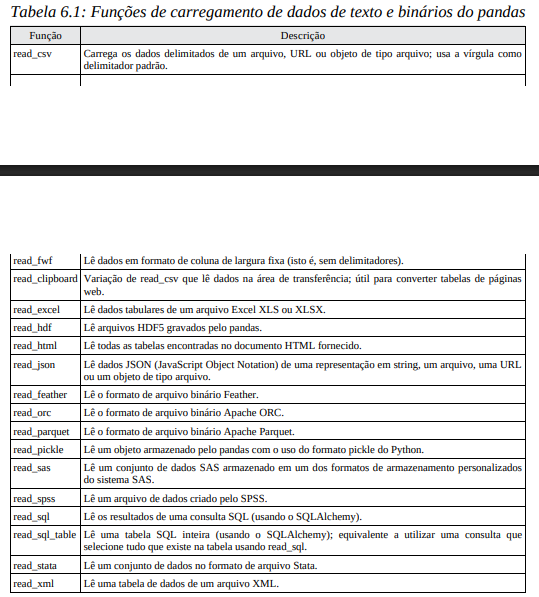

Seus argumentos
opcionais se enquadram em algumas categorias:

Indexação
Pode tratar uma ou mais colunas como o DataFrame retornado e define se
os nomes das colunas devem ser obtidos no arquivo, nos argumentos
fornecidos ou em nenhum dos dois.

Inferência de tipos e conversão de dados
Inclui conversões de valores definidas pelo usuário e uma lista
personalizada de marcadores de valores ausentes.

Parsing de data e hora
Inclui um recurso de combinação que pode combinar informações de data e
hora de várias colunas em uma única coluna no resultado.

Iteração
Suporte à iteração por blocos de arquivos muito grandes.

Problemas com dados sujos
Inclui pular linhas ou um rodapé, comentários, ou outros itens menores,
como dados numéricos com vírgulas para separar milhares.


In [4]:
df = pd.read_csv("ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Nem sempre os arquivos tem uma linha de cabeçalho.

Para ler esse arquivo, temos duas opções. Podemos permitir que o pandas
atribua nomes de coluna padrão ou especificar os nomes por conta própria:

In [6]:
pd.read_csv("ex2.csv", header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
pd.read_csv("ex2.csv", names=["a", "b", "c", "d", "message"])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Suponhamos que você quisesse que a coluna message fosse o índice do
DataFrame retornado. Você pode indicar que deseja a coluna no índice 4 ou
nomear "message" usando o argumento `index_col`:

In [8]:
names = ["a", "b", "c", "d", "message"]
pd.read_csv("ex2.csv", names=names, index_col="message")

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


Se quiser formar um índice hierárquico a partir de várias colunas, passe uma lista de
números ou nomes de colunas:

In [10]:
parsed = pd.read_csv("csv_mindex.csv", index_col=["key1","key2"])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

Em alguns casos, uma tabela pode não ter um delimitador fixo, usando o
espaço em branco ou outro padrão para separar os campos. Considere um
arquivo de texto que tivesse esta aparência:

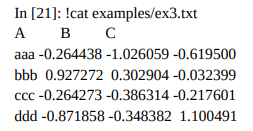

Embora você possa fazer algumas manipulações manualmente, os campos mostrados aqui estão separados por uma quantidade variável de espaços em branco. Nesses casos, podemos passar uma expressão regular como delimitador para `pandas.read_csv`. O exemplo anterior poderia usar a expressão regular *\s+* e, então, teríamos:

In [11]:
result = pd.read_csv("ex3.txt", sep="\s+")
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


Já que havia um nome de coluna a menos em comparação com o número de
linhas de dados, pandas.read_csv infere que a primeira coluna deve ser o índice
do DataFrame nesse caso especial.

podemos ignorar a primeira, a terceria e a quarta linhas de um arquivo com `skiprows`:

In [12]:
pd.read_csv("ex4.csv", skiprows=[0,2,3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


A manipulação de valores ausentes é uma parte importante e frequentemente nuançada do processo de leitura de arquivos. Geralmente, os dados ausentes
não estão presentes (são strings vazias) ou aparecem marcados por algum valor de sentinela (placeholder). Por padrão, o pandas usa um conjunto de
sentinelas de ocorrência comum, como NA e NULL:

In [15]:
result = pd.read_csv("ex5.csv")
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


Lembre-se de que o pandas exibe os valores ausentes como NaN, logo, temos
dois valores nulos ou ausentes em result:

In [16]:
pd.isna(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


A opção `na_values` recebe uma sequência de strings para serem adicionadas à lista padrão de strings reconhecidas como de ausência:

In [17]:
result = pd.read_csv("ex5.csv", na_values=["NULL"])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


`pandas.read_csv` tem uma lista com várias representações padrão para o valor
NA, mas esses padrões podem ser desativados com a opção **`keep_default_na`**:

In [18]:
result2 = pd.read_csv("ex5.csv", keep_default_na=False)
result2

,something,a,b,c,d,message
0,one,1,2,3,4,NA
1,two,5,6,,8,world
2,three,9,10,11,12,foo


In [19]:
 result2.isna()

,something,a,b,c,d,message
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False


In [20]:
result3 = pd.read_csv("ex5.csv", keep_default_na=False, na_values=["NA"])
result3                                                            

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,two,5,6,,8,world
2,three,9,10,11,12,foo


In [21]:
result3.isna()

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False


Sentinelas NA diferentes podem ser especificadas para cada coluna em um
dicionário:

In [23]:
sentinels = {"message": ["foo", "NA"], "something": ["two"]}
pd.read_csv("ex5.csv", na_values=sentinels, keep_default_na=False)

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,NaN,5,6,,8,world
2,three,9,10,11,12,NaN


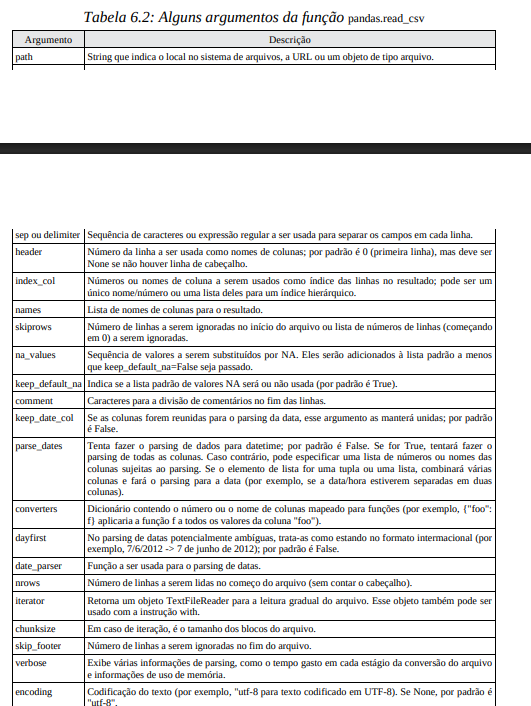

### Leitura de arquivos de texto por partes

No processamento de arquivos muito grandes, ou se quisermos saber qual o conjunto certo de argumentos para o processamento correto de um arquivo grande, pode ser melhor ler apenas uma pequena parte de um arquivo ou iterar por partes menores dele.
Antes de examinar um arquivo grande, alteraremos as configurações do pandas para que a exibição seja mais compacta:

In [3]:
pd.options.display.max_rows = 10

In [4]:
result = pd.read_csv("ex6.csv")
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


Se quiser ler apenas um pequeno número de linhas (evitando a leitura do arquivo inteiro), especifique isso com `nrows`:

In [5]:
pd.read_csv("ex6.csv", nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


Para ler um arquivo por partes, especifique um número de linhas para `chunksize`(tamanho do bloco):

In [7]:
chunker = pd.read_csv("ex6.csv", chunksize=(1000))
type(chunker)

pandas.io.parsers.readers.TextFileReader

O objeto `TextFileReader` retornado por pandas.read_csv permite iterar pelas partes do arquivo de acordo com o chunksize. Por exemplo, podemos iterar por ex6.csv agregando as contagens de valores na coluna "key", desta forma:

In [9]:
pd.read_csv("ex6.csv", chunksize=1000)
tot = pd.Series([], dtype='int64')
for piece in chunker:
    tot = tot.add(piece["key"].value_counts(), fill_value=0)

tot = tot.sort_values(ascending=False)
tot[:10]

Series([], dtype: int64)

### Gravação de dados em formato texto

Os dados também podem ser exportados para um formato delimitado. Examinaremos um dos arquivos CSV que já lemos:

In [10]:
data = pd.read_csv("ex5.csv")
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


Usando o método to_csv do DataFrame, podemos gravar os dados em um arquivo de conteúdo separado por vírgulas:

In [12]:
data.to_csv("out.csv")

### Trabalho com outros formatos delimitados

É possível carregar a maioria dos formatos de dados tabulares a partir do disco com o uso de funções como pandas.read_csv. Em alguns casos, no entanto, algum processamento manual pode ser necessário. Não é incomum recebermos um arquivo com uma ou mais linhas malformadas que podem confundir pandas.read_csv.

Para arquivos com um delimitador de caractere único, você pode usar o módulo interno `csv` do Python. Para usá-lo, passe qualquer arquivo aberto ou um objeto de tipo arquivo para csv.reader:

In [14]:
import csv
f = open("ex7.csv")
reader = csv.reader(f)

A iteração por reader como em um arquivo gera listas de valores nas quais qualquer caractere de aspas é removido:

In [16]:
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [17]:
f.close()

A partir daí, cabe a você fazer a manipulação necessária para colocar os dados no formato requerido. Faremos isso etapa a etapa. Primeiro, leremos o arquivo em uma lista de linhas:

In [18]:
with open("ex7.csv") as f:
    lines = list(csv.reader(f))

Em seguida, dividiremos as linhas em linha de cabeçalho e linhas de dados:

In [20]:
header, values = lines[0],lines[1]

Agora podemos criar um dicionário de colunas de dados usando uma dictionary comprehension e a expressão zip(*values) (cuidado porque esse recurso usa muita memória em arquivos grandes), que fará a transposição de linhas para colunas:

In [21]:
data_dict = {h: v for h, v in zip(header, zip(*values))}
data_dict

{'a': ('1', '2', '3')}

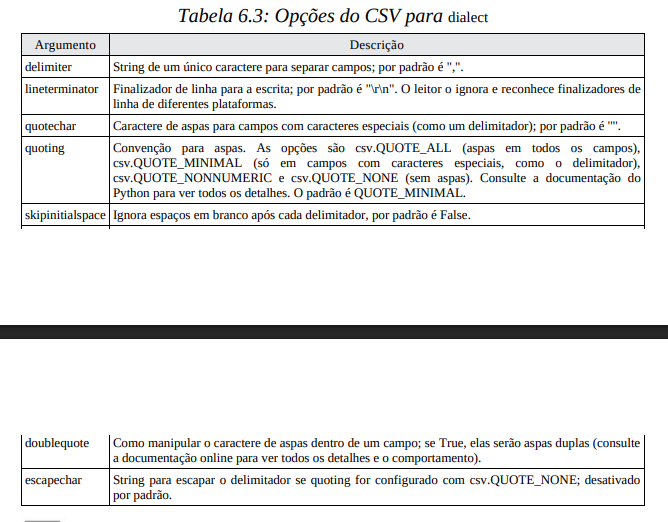

### Dados JSON

Usarei json aqui, já que ela foi incluída na biblioteca padrão Python. Para converter
uma string JSON para o formato Python, use `json.loads`:

In [22]:
import json

In [ ]:
result = json.loads(obj)

`json.dumps`, por outro lado, converte um objeto Python novamente em JSON:

In [ ]:
asjson = json.dumps(result)
asjson

Como você converterá um objeto ou uma lista de objetos JSON em um DataFrame ou outra estrutura de dados para análise será uma decisão sua. Uma solução conveniente seria passar uma lista de dicionários (que anteriormente eram objetos JSON) para o construtor do DataFrame e selecionar um subconjunto dos campos de dados:

In [ ]:
siblings = pd.DataFrame(result["siblings"], columns=["name", "age"])
siblings

`pandas.read_json` pode converter automaticamente conjuntos de dados JSON
organizados de modo específico em uma Series ou DataFrame.

As opções padrão de `pandas.read_json` assumem cada objeto do array JSON como uma linha da tabela:

In [26]:
data = pd.read_json("example.json")
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


Se você precisar exportar dados do pandas para JSON, uma maneira seria usando os métodos `to_json` na Series e no DataFrame

### XML e HTML: web scraping

>O Python tem muitas bibliotecas para a leitura e a gravação de dados nos
sempre presentes formatos HTML e XML. Alguns exemplos seriam o lxml, o
Beautiful Soup e o html5lib. Embora em geral o lxml seja comparativamente
muito mais rápido, as outras bibliotecas conseguem lidar melhor com
arquivos HTML ou XML malformados.


`pandas.read_html`, usa todas essas bibliotecas para fazer o parsing automático de tabelas de arquivos HTML como objetos DataFrame.

A função pandas.read_html tem várias opções, mas por padrão ela procura e tenta fazer o parsing de todos os dados tabulares contidos dentro de tags `<table>`. O resultado é uma lista de objetos DataFrame:

In [27]:
tables = pd.read_html("fdic_failed_bank_list.html")
len(tables)

1

In [29]:
failures = tables[0]
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


Já que failures tem muitas colunas, o pandas insere um caractere de quebra de
linha \.

poderíamos
fazer alguma limpeza e análise de dados, como calcular o número de
falências bancárias por ano:


In [30]:
close_timestamps = pd.to_datetime(failures["Closing Date"])
close_timestamps.dt.year.value_counts()

Closing Date
2010    157
2009    140
2011     92
2012     51
2008     25
       ... 
2004      4
2001      4
2007      3
2003      3
2000      2
Name: count, Length: 15, dtype: int64

### Parsing de XML com lxml.objectify

Usando `lxml.objectify` faremos o parsing do arquivo e obteremos uma referência
ao nó raiz do arquivo XML com `getroot`:

In [31]:
from lxml import objectify

path = "Performance_MNR.xml"
with open(path) as f:
    parsed = objectify.parse(f)
root = parsed.getroot()

`root.INDICATOR` retorna um gerador que fornece cada elemento XML
`<INDICATOR>`. Para cada registro, podemos preencher um dicionário de nomes
de tags (como YTD_ACTUAL) para valores de dados (excluindo algumas tags)
executando o código a seguir:

In [33]:
data = []
skip_fields = ["PARENT_SEQ", "INDICATOR_SEQ",
        "DESIRED_CHANGE", "DECIMAL_PLACES"]
for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

Para concluir, converta essa lista de dicionários em um DataFrame:

In [34]:
perf = pd.DataFrame(data)
perf.head()

,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,INDICATOR_UNIT,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,%,95.0,96.9,95.0,96.9
1,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,2,Service Indicators,M,%,95.0,96.0,95.0,95.0
2,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,3,Service Indicators,M,%,95.0,96.3,95.0,96.9
3,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,4,Service Indicators,M,%,95.0,96.8,95.0,98.3
4,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,5,Service Indicators,M,%,95.0,96.6,95.0,95.8


In [ ]:
A função pandas.read_xml do pandas transforma esse processo em uma expressão
de linha única:
